### DecisionTree

| 알고리즘 | 유형 | 주요 특징 | 주요 하이퍼파라미터 |
|-----------|--------|------------|-------------------------|
| **Decision Tree** | 분류/회귀 | 직관적, 해석 쉬움, 과적합에 주의 | `max_depth`, `min_samples_split`, `criterion` (`gini`, `entropy`), `min_samples_leaf` |



### 머신러닝 모델 개발 및 평가 단계 (전체 흐름도) <br>
<center>
[1. 데이터 준비 및 X,y 생성]<br>
        ↓<br>
[2. 학습/검증용 데이터 분할 (Train/Test Split)]<br>
        ↓<br>
[3. 전처리 및 모델 pipeline 만들기]<br>
[4. 하이퍼파라미터 탐색 및 모델 튜닝 (GridSearchCV)]<br>
        ↓<br>
[5. 모델 학습 (Fit)]<br>
        ↓<br>
[6. 학습 결과 평가 (Best Params, Score)]<br>
        ↓<br>
[7. 테스트셋 최종 평가 (Best Estimator Predict)]
</center>

## 분류

#### 1. 데이터 준비 및 X,y 생성

In [2]:
import pandas as pd
cancer = pd.read_csv("data/Cancer_Data.csv")

X = cancer.drop(columns="diagnosis")#.values
y = cancer['diagnosis']#.values

#### 2. 학습/검증용 데이터 분할 (Train/Test Split)

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### 3. 전처리 및 모델 pipeline 만들기 <br> 4. 하이퍼파라미터 탐색 및 모델 튜닝 (GridSearchCV)

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {
    "max_depth":range(1, 14), 
    "max_leaf_nodes": range(10, 56),
    "min_samples_leaf": range(10, 1001, 50),
    "max_features": range(1, 13)
}
# gs = GridSearchCV(
gs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),
    params,
    n_iter=60,    # 테스트할 하이퍼파라미터 조합 개수 (random하게 조합을 선택한다.)
    scoring='accuracy', 
    cv=5,         # cross validation fold 개수
    n_jobs=-1
)

#### 5. 모델 학습 (Fit)

In [5]:
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 14),
                                        'max_features': range(1, 13),
                                        'max_leaf_nodes': range(10, 56),
                                        'min_samples_leaf': range(10, 1001, 50)},
                   scoring='accuracy')

#### 6. 학습 결과 평가 (Best Params, Score)

In [7]:
gs.best_score_
gs.best_params_

{'min_samples_leaf': 10,
 'max_leaf_nodes': 23,
 'max_features': 4,
 'max_depth': 5}

In [8]:
import pandas as pd
result_cv = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
result_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,0.003597,0.000864,0.002708,0.000399,10,23,4,5,"{'min_samples_leaf': 10, 'max_leaf_nodes': 23,...",0.941860,0.905882,0.929412,0.929412,0.976471,0.936607,0.023084,1
2,0.008820,0.004801,0.003853,0.000543,110,11,12,12,"{'min_samples_leaf': 110, 'max_leaf_nodes': 11...",0.895349,0.917647,0.929412,0.917647,0.917647,0.915540,0.011076,2
49,0.004394,0.000777,0.002360,0.000469,110,14,6,7,"{'min_samples_leaf': 110, 'max_leaf_nodes': 14...",0.941860,0.870588,0.894118,0.929412,0.917647,0.910725,0.025508,3
0,0.006765,0.001784,0.003802,0.000753,110,45,6,12,"{'min_samples_leaf': 110, 'max_leaf_nodes': 45...",0.941860,0.870588,0.894118,0.929412,0.917647,0.910725,0.025508,3
19,0.003748,0.000531,0.001878,0.000787,110,29,10,7,"{'min_samples_leaf': 110, 'max_leaf_nodes': 29...",0.941860,0.870588,0.894118,0.882353,0.917647,0.901313,0.025558,5


#### 7. 테스트셋 최종 평가 (Best Estimator Predict)

gs.best_estimator_  Feature importance 확인

In [10]:
best_model = gs.best_estimator_
fi = pd.Series(best_model.feature_importances_, index=cancer.columns[:-1]).sort_values(ascending=False)
fi

fractal_dimension_se       0.814058
compactness_mean           0.091337
compactness_se             0.046767
texture_se                 0.025817
texture_worst              0.007091
concave points_se          0.006466
symmetry_se                0.004028
radius_se                  0.003346
concavity_mean             0.001090
smoothness_mean            0.000000
perimeter_mean             0.000000
area_mean                  0.000000
texture_mean               0.000000
id                         0.000000
radius_mean                0.000000
diagnosis                  0.000000
area_se                    0.000000
perimeter_se               0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
concave points_mean        0.000000
smoothness_se              0.000000
concavity_se               0.000000
radius_worst               0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0

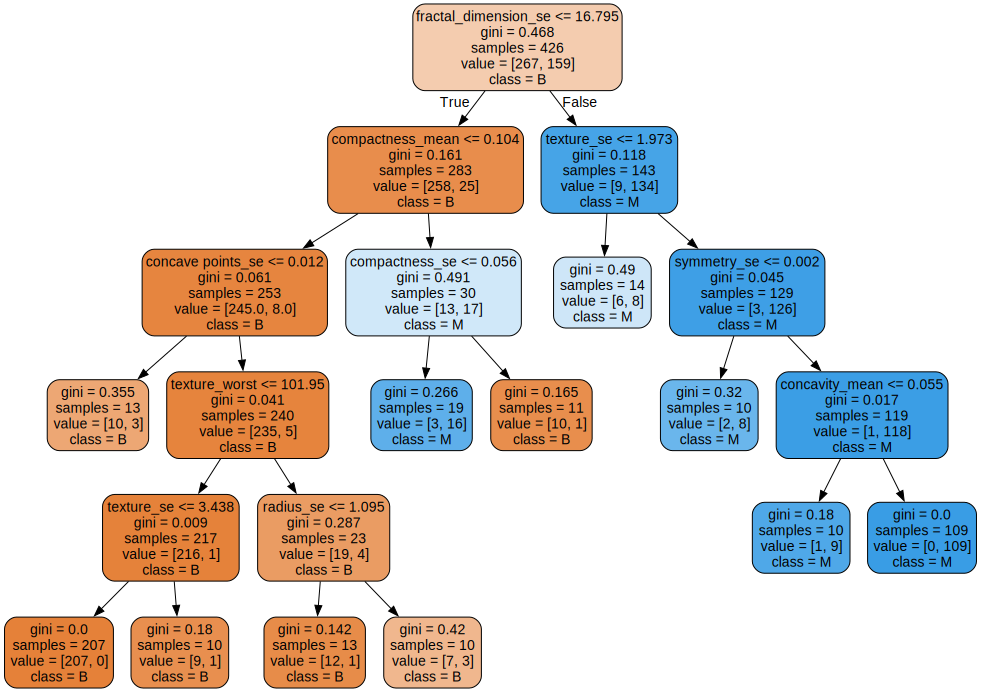

In [11]:
# 시각화

from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(
    export_graphviz(
        best_model, 
        feature_names=cancer.columns[:-1],
        class_names = ["B", "M"],
        filled=True,
        rounded=True
    )
)
graph

### 회귀
- DecisionTreeRegressor  사용

#### 1. 데이터 준비 및 X,y 생성

In [52]:
import pandas as pd

df = pd.read_csv("data/second_cars.csv")

X = df.drop(columns=['Price']).values
y = df['Price'].values


#### 2. 학습/검증용 데이터 분할 (Train/Test Split)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
categorical_columns = ['Brand','Model','Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numeric_columns = ['Car_ID', 'Kilometers_Driven', 'Mileage','Engine','Power','Seats']
target = "Price"

categorical_columns_index = [2,3,4,6,7,8]
numeric_columns_index = [1,5,9,10,11,12]
# 전처리 파이프라인
# 범주형: 결측치 처리- 최빈값 & OneHot Encoding
# 수치형: 결측치 처리 - 중앙값 & Standard Scaling

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

### 범주형 컬럼들에 적용할 전처리 프로세스
cate_pipeline = Pipeline([                        # 범주형 컬럼을 위한 파이프라인 
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("le", LabelEncoder())   # handle_unknown='ignore' - 학습할 때 없었던 class는 0으로 처리.  # .default는 exception 발생
])

num_pipeline = Pipeline([                     # 수치형 컬럼을 위한 파이프라인 
    ("imputer", SimpleImputer(strategy="median")), # 1. 결측치 처리
    ("scaler", StandardScaler())   # 2. Feature Scaling
])

# ColumnTransformer로 두개의 전처리 프로세스를 합친다.
preprocessor = ColumnTransformer([
    ("category", cate_pipeline, categorical_columns_index),  #(설정이름, 전처리기, 적용한 컬럼 index)
    ("number", num_pipeline, numeric_columns_index)
])

In [60]:
preprocessor

ColumnTransformer(transformers=[('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('le', LabelEncoder())]),
                                 [2, 3, 4, 6, 7, 8]),
                                ('number',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 [1, 5, 9, 10, 11, 12])])

#### 3. 전처리 및 모델 pipeline 만들기 <br> 4. 하이퍼파라미터 탐색 및 모델 튜닝 (GridSearchCV)

In [61]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source
from metrics import print_regression_metrcis

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("Decisiontree", DecisionTreeRegressor(max_depth = 2, random_state=0))     #회귀모델
])

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {
    "max_depth":range(1, 14), 
    "max_leaf_nodes": range(10, 56),
    "min_samples_leaf": range(10, 1001, 50),
    "max_features": range(1, 13)
}
# gs = GridSearchCV(
gs = RandomizedSearchCV(
    pipeline,
    params,
    n_iter=60,    # 테스트할 하이퍼파라미터 조합 개수 (random하게 조합을 선택한다.)
    scoring='accuracy', 
    cv=5,         # cross validation fold 개수
    n_jobs=-1
)

#### 5. 모델 학습 (Fit)

In [62]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Mercedes'

#### 6. 학습 결과 평가 (Best Params, Score)

In [ ]:
model.get_depth()
model.get_n_leaves()

#### 7. 테스트셋 최종 평가 (Best Estimator Predict)

gs.best_estimator_  Feature importance 확인

In [ ]:
print_regression_metrcis(y_train, model.predict(X_train))
print_regression_metrcis(y_test, model.predict(X_test))

In [ ]:
## 분기 구조를 시각화
graph = Source(
    export_graphviz(
        model, 
        feature_names=X.columns, 
        filled=True, rounded=True
    )
)

graph


# value = 값의 평균
# squared_error = (각 실제 값 - 평균)**2
# 그래서 이 squared_error 가 최소화하기 위해 또 분기를 함.-> 그래서 분기를 하기 위한 첫번째 질문이 LSTAT <= 8.13인지를 물어봄.
graph

In [ ]:
fi = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
fi